In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv', encoding="ISO-8859-1")

In [3]:
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg      1339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg      2537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg      1803.60

# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS    1.37      1339.69  
1        Intel HD Graphics 6000  macOS    1.34       898.94  
2         Intel HD Graphics 620  No OS    1.86       575.00  
3            AMD Radeon Pro 455  macOS    1.83      2537.45  
4  Intel Iris Plus Graphics 650  macOS    1.37      1803.60

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

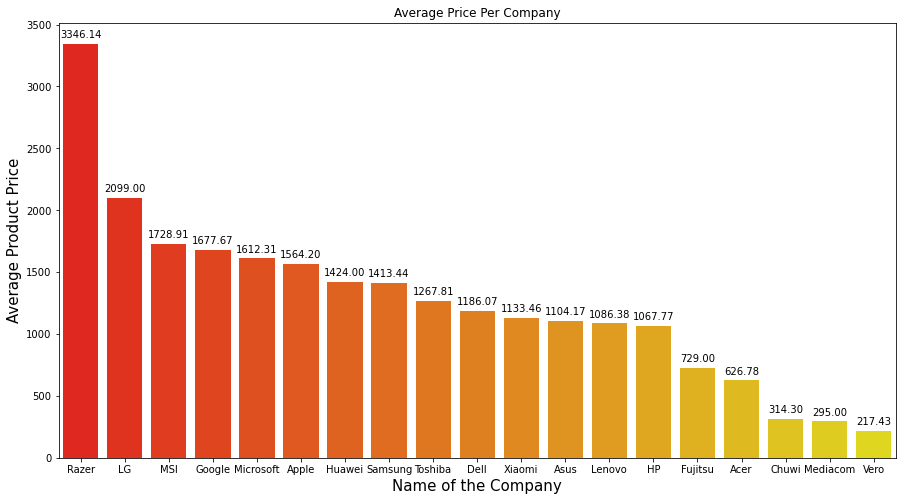

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype

In [16]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [17]:
df.head()

Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  \
0        1      300         4    13.3                23   65    8       4   
1        1      301         4    13.3                 1   63    8       2   
2        7       50         3    15.6                 8   74    8      16   
3        1      300         4    15.4                25   85   16      29   
4        1      300         4    13.3                23   67    8      16   

   Gpu  OpSys  Weight  Price_euros  
0   58      8    1.37      1339.69  
1   51      8    1.34       898.94  
2   53      4    1.86       575.00  
3    9      8    1.83      2537.45  
4   59      8    1.37      1803.60

In [18]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [19]:
y = df.Price_euros
x = df.drop('Price_euros', axis =1)

In [20]:
from sklearn.model_selection import train_test_split as tts

In [21]:
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [22]:
xtrain.head()

Company  Product  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  \
987        10      291         1    15.6                15  102    8       5   
1146        7      110         4    12.5                 8   88    8      16   
1055        7      366         3    15.6                 0   58    4      26   
372         2      408         1    17.3                15   26   16      18   
1273        7        2         3    15.6                 0   89    6      10   

      Gpu  OpSys  Weight  
987    79      5    2.50  
1146   47      7    1.26  
1055   47      5    2.31  
372    37      5    3.25  
1273   21      5    2.19

In [23]:
ytrain.head()

987     1189.00
1146    2296.95
1055     705.15
372     2199.00
1273     764.00
Name: Price_euros, dtype: float64

# Linear Regression for Multi variable

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
lr.coef_

array([ 1.29839486e+01,  1.00733071e-01,  4.04766000e+01, -8.20915349e+01,
        7.68575788e+00,  4.41465496e+00,  8.48309481e+01,  5.66971880e+00,
        3.56894640e+00,  8.78510293e+01,  1.09757241e+02])

In [27]:
lr.intercept_

92.05687093377333

In [28]:
predicted_price1 = lr.predict(xtest)
predicted_price1

array([ 550.02199257, 1140.90570522, 2009.53835739, 1214.60613417,
       1348.15601869, 1149.82148652, 1158.69293027,  617.16783862,
        171.42327416, 1237.61968073, 1236.76895474, 1036.84698423,
       1401.75464047, 1493.61711106, 1239.48044331, 1805.26443684,
        887.33060816, 1193.15278883, 1062.33746784,  679.19033358,
        912.64480261,  622.02803122, 2001.39979141, 1381.5012364 ,
        664.30995635, 1642.31072785,  613.85785079, 1063.75221199,
       1234.34767683, 1384.80832419, 2048.81954782,  669.61269856,
       1149.132464  , 1375.19281501, 2108.70348056,  568.46381067,
        686.23445654,  650.06787525,  265.37776062, 1187.23313245,
       1050.41060443,  727.85767081,  724.82250433,  730.94396223,
       1261.33169466,  507.02126271,  857.28781896, 1999.64073608,
       1180.50442346, 2092.45597453, 1067.64898377, 1235.63296522,
       2017.41495448, 1271.14892691, 1164.48502094, 1067.5482507 ,
       1904.19202066, 1135.50483503, 1086.78862196,  747.87563

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linear_score = r2_score(ytest, predicted_price1)
print('r2 socre is  ',linear_score)

r2 socre is   0.6617601112593993


# KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()

In [31]:
kr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [32]:
kr.predict(xtest)

array([1521.   ,  561.   , 1215.   ,  889.5  , 1342.6  , 1054.998,
        625.2  ,  976.94 ,  286.8  , 1558.6  , 1668.068, 1049.8  ,
       2137.4  , 1653.4  , 1279.   , 1188.4  , 1088.4  , 1254.8  ,
       2021.58 , 1698.4  ,  731.8  ,  719.958, 1762.8  , 1267.6  ,
       1210.8  , 1162.328,  482.14 ,  611.   ,  558.   ,  825.   ,
       2771.044,  660.6  , 1405.52 , 1310.8  , 1535.6  , 1082.58 ,
        741.176,  570.4  ,  460.714, 1218.92 , 1144.6  ,  479.2  ,
        662.496,  789.58 , 1415.18 ,  615.736, 1414.4  , 1579.   ,
        897.202, 2055.82 , 1243.86 , 1215.   , 1598.8  , 1151.   ,
       1031.6  , 1243.86 , 2297.27 , 1180.4  , 1210.4  ,  701.726,
       2208.6  , 1513.   , 2061.58 , 2355.172,  686.   , 1651.4  ,
        416.2  ,  323.4  , 2725.856,  561.   , 1237.946, 1366.6  ,
       1280.878, 1445.2  , 2308.77 , 1234.93 ,  899.4  ,  928.   ,
       1325.6  , 1755.496,  473.63 ,  990.932, 1050.   , 1089.962,
        453.8  , 1407.198, 1398.678, 1921.   ,  678.354,  418.

In [33]:
knn_score = kr.score(xtest, ytest)
knn_score

0.7569821455495889

# XGBoost Regression

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [35]:
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
xgb_score = xgb.score(xtest,ytest)
xgb_score

# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

In [39]:
abr.fit(xtrain, ytrain)

AdaBoostRegressor()

In [41]:
abr_score = abr.score(xtest, ytest)
abr_score

0.6366458146088398

# RandomForest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [43]:
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [45]:
rfr_score = rfr.score(xtest, ytest)
rfr_score

0.8596947222303655

# DecisonTree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [47]:
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [48]:
dtr_score = dtr.score(xtest, ytest)
dtr_score

0.7492657146800911

# Comaparing Scores

In [50]:
print("Linear Regression Score: ", linear_score)
print("KNN Regression Score: ", knn_score)
print("XGB Regression Score: ", xgb_score)
print("AdaBoost Regression Score: ", abr_score)
print("Random Forest Regression Score: ", rfr_score)
print("Decision Tree Regression Score: ", dtr_score)

Linear Regression Score:  0.6617601112593993
KNN Regression Score:  0.7569821455495889
XGB Regression Score:  0.8616816152979866
AdaBoost Regression Score:  0.6366458146088398
Random Forest Regression Score:  0.8596947222303655
Decision Tree Regression Score:  0.7492657146800911
